Playing with **Excellent Pandas Notebooks from book Pandas Cookbook:** [kaggle discussion](https://www.kaggle.com/discussions/getting-started/120943)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')

In [47]:
df_bikes = pd.read_csv('../data/bikes_montreal_2012.csv', 
                       encoding='ISO-8859-1', 
                       sep=';',
                       parse_dates=['Date'],
                       dayfirst=True,
                       index_col='Date')
df_bikes[:9]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN
2012-01-06,146,NaN,0,98,244,86,4,75,NaN
2012-01-07,98,NaN,2,80,108,53,6,54,NaN
2012-01-08,95,NaN,1,62,98,64,11,63,NaN
2012-01-09,244,NaN,2,165,432,198,12,173,NaN


<Axes: xlabel='Date'>

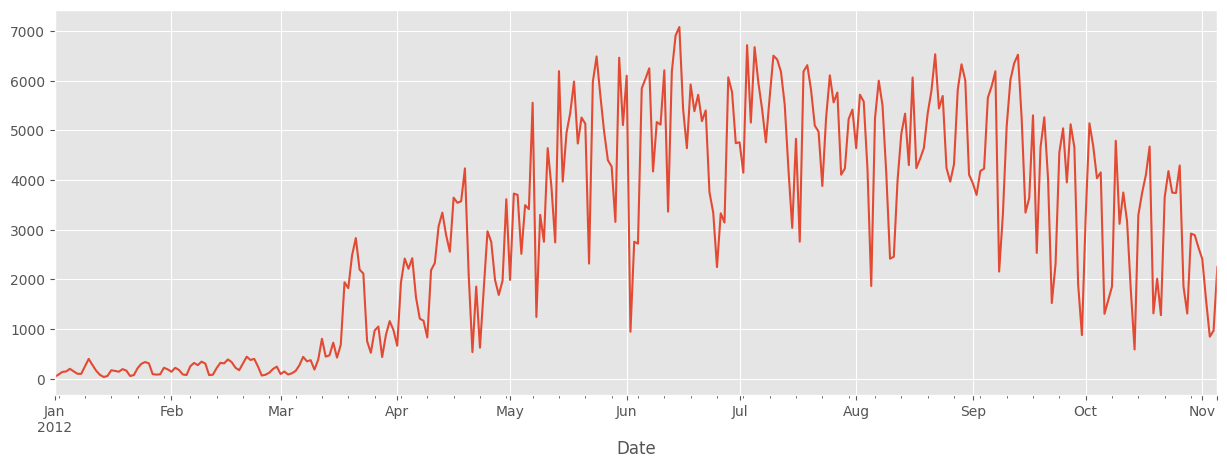

In [48]:
df_bikes['Berri 1'].plot()

## 4.1 Adding a 'weekday' column to our dataframe

In [58]:
df_berri_bikes = df_bikes[['Berri 1']].copy()
df_berri_bikes[:4]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144


In [59]:
df_berri_bikes.loc[:, 'weekday'] = df_berri_bikes.index.weekday
df_berri_bikes[:6]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3
2012-01-06,146,4


## 4.2 Adding up the cyclists by weekday

In [80]:
weekday_counts = df_berri_bikes.groupby('weekday').aggregate('sum')
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


<Axes: >

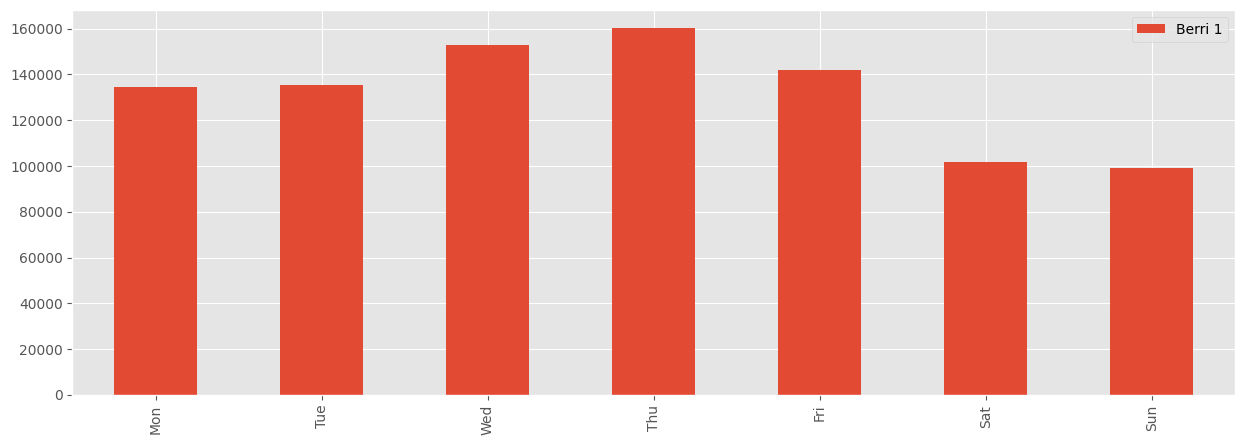

In [81]:
# It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so let's fix it up and graph it
weekday_counts.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_counts.plot(kind='bar')